<a href="https://colab.research.google.com/github/TBhanusai/AlMl-project/blob/main/ann_model_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Load dataset from Excel file
data = pd.read_excel('/content/kharif(capstone project_dataset).xlsx')

In [ ]:
# Display the first few rows of the dataset
print(data.head())

       State         District   Year Range  Kharif Crop Area (Hectares)  \
0  Karnataka  Bangalore rural    1997-1998                          NaN   
1  Karnataka  Bangalore rural  1998 - 1999                      23543.0   
2  Karnataka  Bangalore rural  1999 - 2000                      18643.0   
3  Karnataka  Bangalore rural  2000 - 2001                      17892.0   
4  Karnataka  Bangalore rural  2001 - 2002                      12305.0   

   Kharif Production (Tonnes)  Kharif Yield (Tonne/Hectare)  \
0                         NaN                           NaN   
1                     24490.0                          1.04   
2                     14273.0                          0.77   
3                     16596.0                          0.93   
4                     14116.0                          1.15   

     Kharif Temperature (°C)  Kharif Rainfall (in mm)  \
0                       21.0                   649.15   
1                       23.5                   641.79   

In [ ]:
data.tail()

,State,District,Year Range,Kharif Crop Area (Hectares),Kharif Production (Tonnes),Kharif Yield (Tonne/Hectare),Kharif Temperature (°C),Kharif Rainfall (in mm),Fertilizer Quantity (kg/ha),Nitrogen (%),Phosphorus (%),Potassium (%),Calcium (%),Sulfur (%),Zinc (%),Boron (%)
1060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1064,Karnataka,NaN,2022 - 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         806 non-null    object 
 1   District                      805 non-null    object 
 2   Year Range                    806 non-null    object 
 3   Kharif Crop Area (Hectares)   697 non-null    float64
 4   Kharif Production (Tonnes)    697 non-null    float64
 5   Kharif Yield (Tonne/Hectare)  706 non-null    float64
 6     Kharif Temperature (°C)     805 non-null    float64
 7   Kharif Rainfall (in mm)       805 non-null    float64
 8   Fertilizer Quantity (kg/ha)   805 non-null    float64
 9   Nitrogen (%)                  805 non-null    float64
 10  Phosphorus (%)                805 non-null    float64
 11  Potassium (%)                 805 non-null    float64
 12  Calcium (%)                   805 non-null    float64
 13  Sul

In [ ]:
data.describe()

,Kharif Crop Area (Hectares),Kharif Production (Tonnes),Kharif Yield (Tonne/Hectare),Kharif Temperature (°C),Kharif Rainfall (in mm),Fertilizer Quantity (kg/ha),Nitrogen (%),Phosphorus (%),Potassium (%),Calcium (%),Sulfur (%),Zinc (%),Boron (%)
count,697.000000,697.000000,706.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,23349.078910,15595.253945,0.752139,27.301988,510.923789,184.667106,5.544870,4.283031,3.462174,2.667876,1.616894,1.092944,0.478907
std,34341.307114,25479.596540,0.302230,4.592447,168.605369,67.644168,2.576161,2.099339,1.478828,1.308940,0.813904,0.541950,0.270734
min,1.000000,1.000000,0.050000,20.100000,202.600000,50.010000,1.020000,0.510000,0.530000,0.520000,0.210000,0.100000,0.050000
25%,900.000000,740.000000,0.530000,23.200000,379.290000,128.080000,3.340000,2.600000,2.200000,1.480000,0.900000,0.580000,0.250000
50%,9189.000000,6189.000000,0.715000,27.200000,513.360000,194.180000,5.740000,4.260000,3.490000,2.650000,1.550000,1.140000,0.470000
75%,32566.000000,20490.000000,0.940000,31.600000,644.220000,243.090000,7.890000,5.880000,4.830000,3.900000,2.390000,1.610000,0.690000
max,174731.000000,237842.000000,1.840000,35.000000,799.180000,296.730000,9.890000,7.980000,5.990000,4.980000,2.990000,2.000000,0.980000


In [ ]:
data.columns

Index(['State', 'District', 'Year Range', 'Kharif Crop Area (Hectares)',
       'Kharif Production (Tonnes)', 'Kharif Yield (Tonne/Hectare)',
       '  Kharif Temperature (°C)', 'Kharif Rainfall (in mm)',
       'Fertilizer Quantity (kg/ha)', 'Nitrogen (%)', 'Phosphorus (%)',
       'Potassium (%)', 'Calcium (%)', 'Sulfur (%)', 'Zinc (%)', 'Boron (%)'],
      dtype='object')

In [ ]:
data.isnull()

,State,District,Year Range,Kharif Crop Area (Hectares),Kharif Production (Tonnes),Kharif Yield (Tonne/Hectare),Kharif Temperature (°C),Kharif Rainfall (in mm),Fertilizer Quantity (kg/ha),Nitrogen (%),Phosphorus (%),Potassium (%),Calcium (%),Sulfur (%),Zinc (%),Boron (%)
0,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1061,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1062,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1063,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
data.isnull().sum()

,0
State,259
District,260
Year Range,259
Kharif Crop Area (Hectares),368
Kharif Production (Tonnes),368
Kharif Yield (Tonne/Hectare),359
Kharif Temperature (°C),260
Kharif Rainfall (in mm),260
Fertilizer Quantity (kg/ha),260
Nitrogen (%),260


In [ ]:
print(data.dtypes)

State                            object
District                         object
Year Range                       object
Kharif Crop Area (Hectares)     float64
Kharif Production (Tonnes)      float64
Kharif Yield (Tonne/Hectare)    float64
  Kharif Temperature (°C)       float64
Kharif Rainfall (in mm)         float64
Fertilizer Quantity (kg/ha)     float64
Nitrogen (%)                    float64
Phosphorus (%)                  float64
Potassium (%)                   float64
Calcium (%)                     float64
Sulfur (%)                      float64
Zinc (%)                        float64
Boron (%)                       float64
dtype: object


In [ ]:
data = pd.get_dummies(data, columns=['State', 'District'], drop_first=True)

In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
# Handle missing values by filling with mean for numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns  # Select numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [ ]:
# Adjust feature names based on actual column names
# Adjust feature names based on actual column names
features = ['Kharif Crop Area (Hectares)', 'Kharif Production (Tonnes)','Kharif Rainfall (in mm)',
            'Kharif Temperature (°C)', 'Fertilizer Quantity (kg/ha)',
            'Nitrogen (%)', 'Phosphorus (%)', 'Potassium (%)','Calcium (%)','Sulfur (%)','Zinc (%)','Boron (%)']
target = 'Kharif Yield (Tonne/Hectare)'

# Select features and target variable
X = data[features]
y = data[target]
# Select features and target variable
X = data[features]
y = data[target]


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define the ANN model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression task

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model with optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Train the model on training data
history = model.fit(X_train, y_train, epochs=100, batch_size=11, validation_split=0.2)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2875 - mae: 0.4467 - val_loss: 0.1444 - val_mae: 0.3232
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1048 - mae: 0.2715 - val_loss: 0.0977 - val_mae: 0.2557
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0603 - mae: 0.1964 - val_loss: 0.0713 - val_mae: 0.1999
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0455 - mae: 0.1579 - val_loss: 0.0689 - val_mae: 0.1900
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0425 - mae: 0.1477 - val_loss: 0.0620 - val_mae: 0.1732
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0379 - mae: 0.1312 - val_loss: 0.0635 - val_mae: 0.1755
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0313 - mae: 0.1201 - val_loss: 0.0556 - val_mae: 0.1597
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0295 - mae: 0.1122 - val_loss: 0.0574 - val_mae: 0.1699
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.028

In [ ]:
# You already have a trained model named 'model', so you can directly use it:
# Predict on the test data using the existing 'model'
y_pred = model.predict(X_test)

# Flatten y_test and y_pred to 1D
# Note: Ensure you use 'y_test' instead of 'Y_test', as 'Y_test' is not defined
y_test = np.ravel(y_test)  # or y_test.flatten()
y_pred = np.ravel(y_pred)  # or y_pred.flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = (np.abs((y_test - y_pred) / y_test)).mean() * 100

# Calculate accuracy as (100 - MAPE)
accuracy = 100 - mape

print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")
print(f"Mean Absolute Error (MAE): {mae:.5f}")
print(f"R² Score: {r2:.5f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Mean Squared Error (MSE): 0.05510
Root Mean Squared Error (RMSE): 0.23474
Mean Absolute Error (MAE): 0.16486
R² Score: 0.11023
Mean Absolute Percentage Error (MAPE): 30.10%
Accuracy: 69.90%


In [ ]:
# Make predictions on test data
predictions = model.predict(X_test)
print(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[ 0.80800223]
 [ 0.72794646]
 [ 0.0968994 ]
 [ 0.72794646]
 [ 0.72794646]
 [ 0.7367927 ]
 [ 0.89186144]
 [ 1.0183953 ]
 [ 0.91307694]
 [ 0.49471867]
 [ 0.7165095 ]
 [ 0.72794646]
 [ 0.8947951 ]
 [ 0.90034336]
 [ 0.9659656 ]
 [ 0.72794646]
 [ 0.72794646]
 [ 1.3762693 ]
 [ 0.72794646]
 [ 0.36737788]
 [ 0.75117576]
 [ 0.04853947]
 [ 0.42963696]
 [ 0.86885643]
 [ 0.72794646]
 [ 0.9092544 ]
 [ 1.2531759 ]
 [ 1.2126039 ]
 [ 0.80309445]
 [ 0.8171383 ]
 [ 0.7815633 ]
 [ 1.2150418 ]
 [ 0.72794646]
 [ 1.0833966 ]
 [ 0.72794646]
 [ 0.2242192 ]
 [ 0.707376  ]
 [ 0.6090496 ]
 [ 0.7568882 ]
 [ 0.69822073]
 [ 0.67219514]
 [ 0.72794646]
 [ 0.5299452 ]
 [ 0.91165733]
 [ 0.6965987 ]
 [ 0.5624936 ]
 [ 0.72794646]
 [ 0.42166433]
 [ 0.8031132 ]
 [ 0.72794646]
 [ 1.0284975 ]
 [ 0.72794646]
 [ 0.603222  ]
 [ 0.64296633]
 [ 0.7809113 ]
 [ 0.72794646]
 [ 0.7292498 ]
 [ 0.72794646]
 [ 0.5835881 ]
 [ 0.23937574]
 [ 0.55493635]
 [ 1.104514  ]
 [ 0.9687789 ]
 [ 0.9026147 ]
 [

# **Visualization**

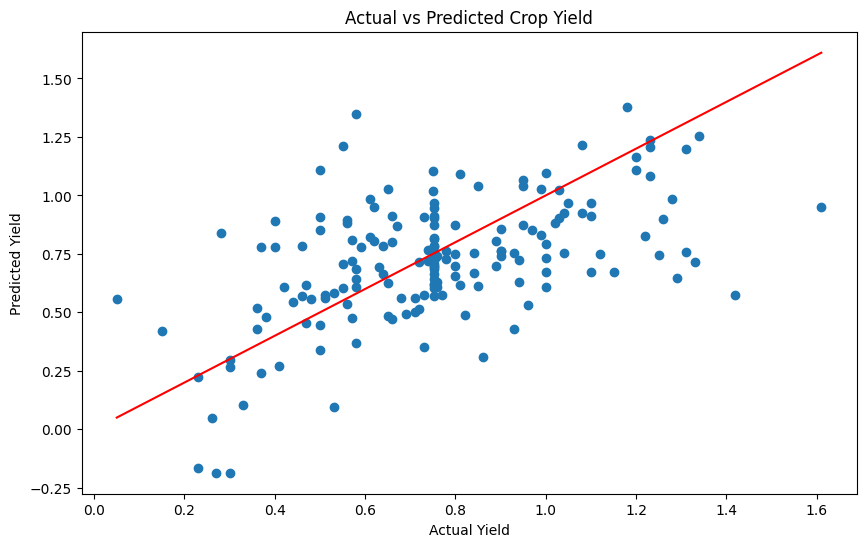

In [ ]:
# Visualize predictions vs actual values
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Crop Yield')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for reference
plt.show()

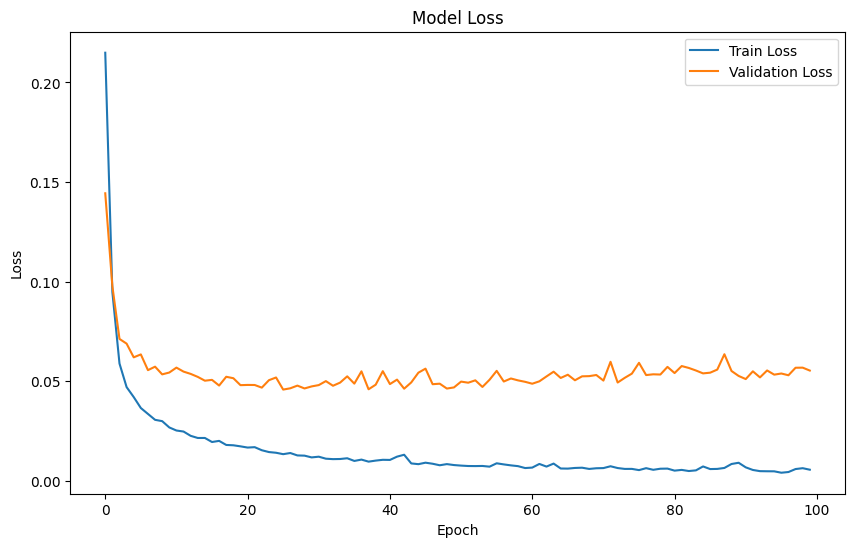

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


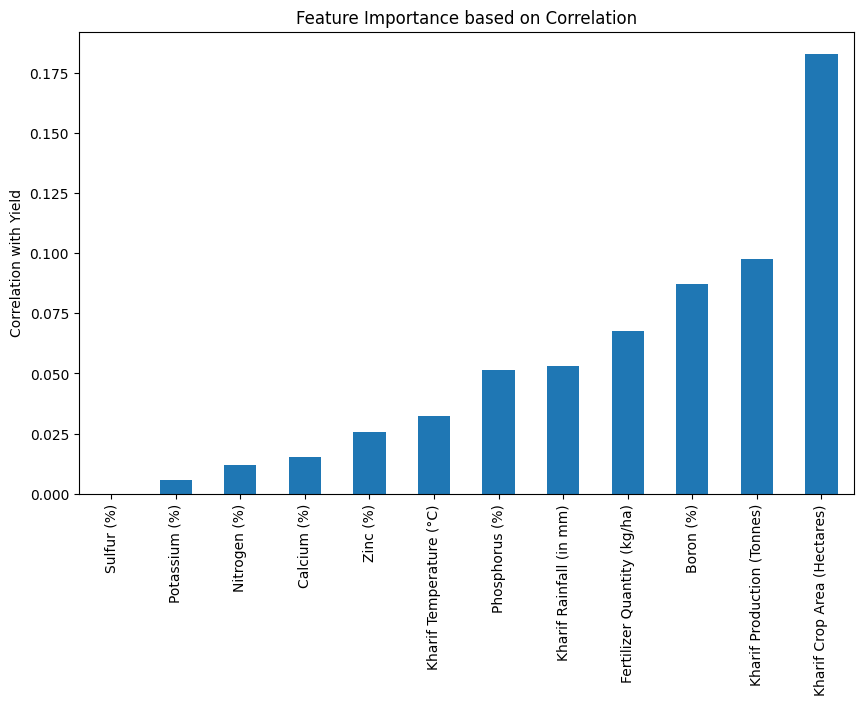

In [ ]:
# Bar plot of feature importance (using mean absolute correlation)
correlation = data[features + [target]].corr()
correlation[target].drop(target).abs().sort_values().plot(kind='bar', figsize=(10,6))
plt.title('Feature Importance based on Correlation')
plt.ylabel('Correlation with Yield')
plt.show()

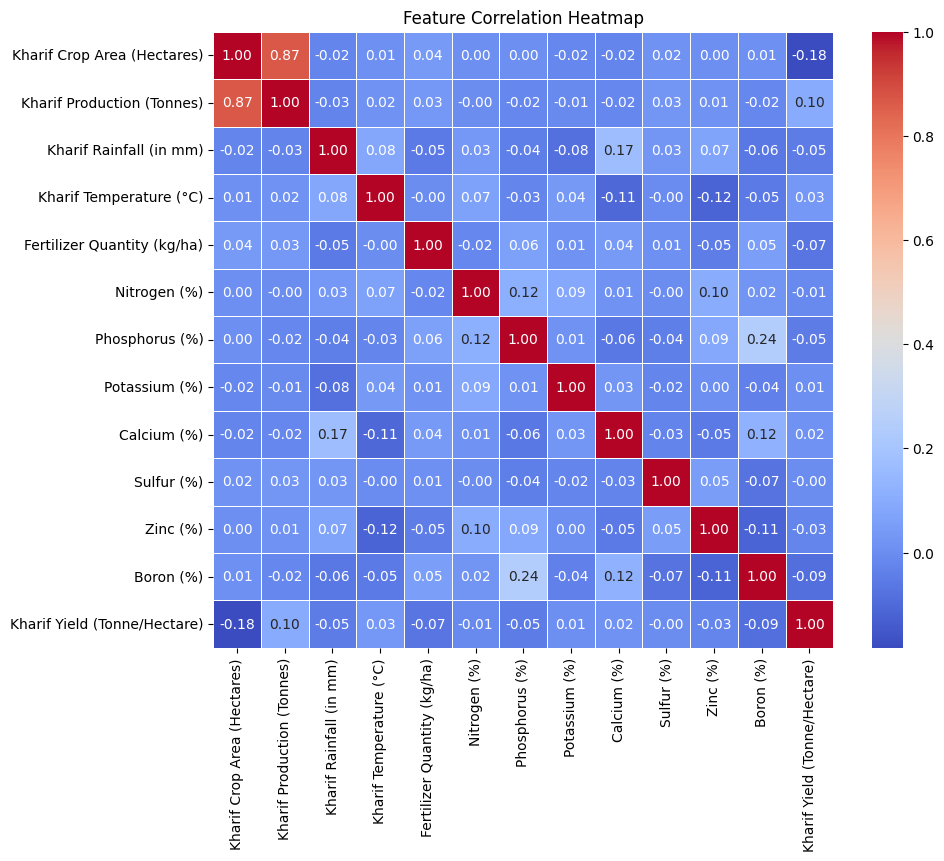

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

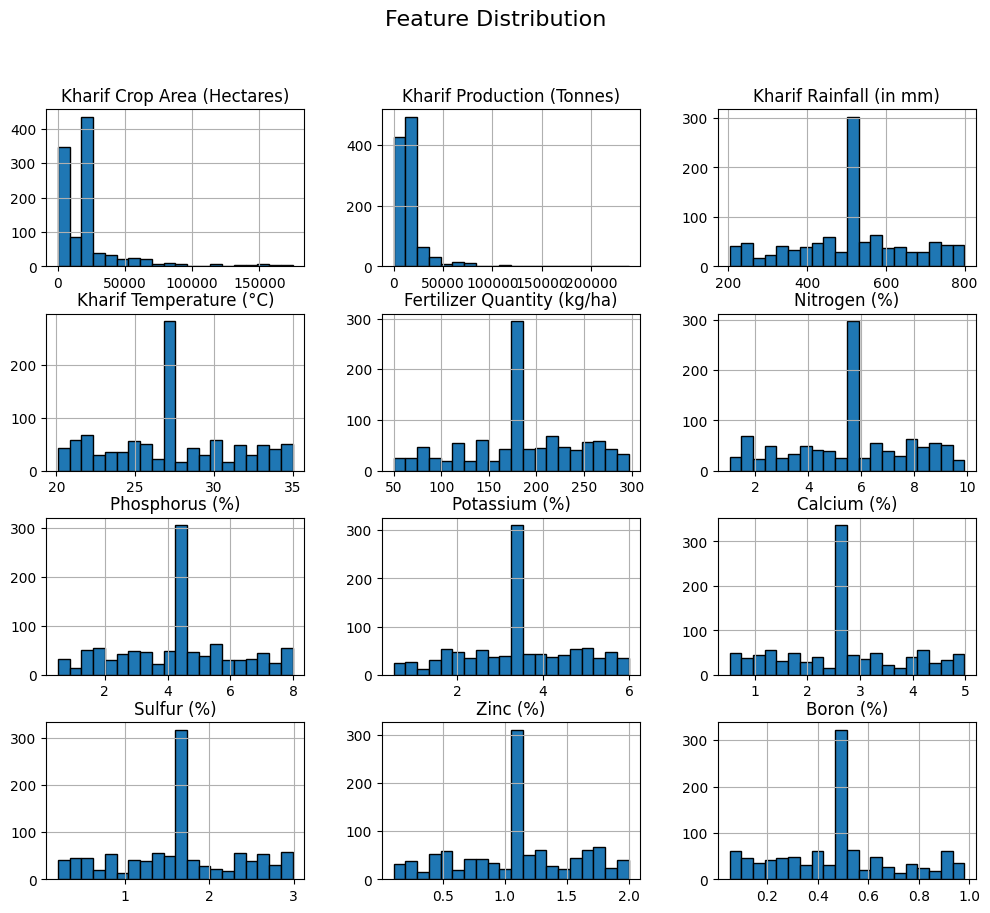

In [ ]:
data[features].hist(figsize=(12,10), bins=20, edgecolor='black')
plt.suptitle('Feature Distribution', fontsize=16)
plt.show()

# **Forcasting Model**

In [ ]:
# Assuming you have already defined X and scaled it during training
# Create a new data DataFrame dynamically based on training features
new_data = pd.DataFrame([[1000, 0, 850, 23, 100, 1.5, 0.8, 1.2,0.2,0.8,1,0.56]],  # Added 0 for 'Kharif Production (Tonnes)'
                          columns=['Kharif Crop Area (Hectares)', 'Kharif Production (Tonnes)','Kharif Rainfall (in mm)',
                                  'Kharif Temperature (°C)', 'Fertilizer Quantity (kg/ha)',
                                  'Nitrogen (%)', 'Phosphorus (%)', 'Potassium (%)','Calcium (%)','Sulfur (%)','Zinc (%)','Boron (%)'])


In [ ]:
# Normalize the new data using the same scaler used for training
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)
new_data_scaled = scaler.transform(new_data)

In [ ]:
# Predict yield using the ANN model
forecasted_yield = model.predict(new_data_scaled)

# Multiply by 100 and print
print(f"Forecasted Yield percentage: {forecasted_yield[0][0] * 100:.5f} Tonne/Hectare")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Forecasted Yield percentage: 72.39090 Tonne/Hectare
